Sumit Parwal 5174593050    Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.svm import LinearSVC,SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn import metrics
import random 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.cluster import SpectralClustering

a)

In [2]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = df.drop(['id'], axis=1)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df['diagnosis'] = pd.Categorical(df['diagnosis']).codes
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
scaler = MinMaxScaler()
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

In [8]:
test=df.query('diagnosis == 0').head(n=int(np.ceil(df.query('diagnosis == 0').shape[0]*0.2)))
test=test.append(df.query('diagnosis == 1').head(n=int(np.ceil(df.query('diagnosis == 1').shape[0]*0.2))))

In [9]:
count_ = test['diagnosis'].value_counts()
print(count_)

0    72
1    43
Name: diagnosis, dtype: int64


In [10]:
train=df.drop(test.index)
count_ = train['diagnosis'].value_counts()
print(count_)

0    285
1    169
Name: diagnosis, dtype: int64


(b)i) Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the accuracy, AUC, ROC, and confusion matrix for both training and test sets

In [11]:
acc_train = []
acc_test = []

prec_train = []
prec_test = []

rec_train = []
rec_test = []

f_score_train = []
f_score_test = []

train_auc = []
test_auc = []



In [12]:
for i in range(30):
        df_new = shuffle(df, random_state=i)
        test=df_new.query('diagnosis == 0').head(n=int(np.ceil(df_new.query('diagnosis == 0').shape[0]*0.2)))
        test=test.append(df.query('diagnosis == 1').head(n=int(np.ceil(df_new.query('diagnosis == 1').shape[0]*0.2))))
        train=df_new.drop(test.index)

        X_train = train.iloc[:,1:]
        X_test = test.iloc[:,1:]

        y_train = train.iloc[:,0]
        y_test =  test.iloc[:,0]
        y_test = np.array(y_test)

        def svc_param_selection(X, y, nfolds):
            param_grid={'C': np.logspace(-2, 10, 13)}
            grid_search = GridSearchCV(LinearSVC( penalty='l1', dual=False), param_grid, cv=nfolds)
            grid_search.fit(X, y)
            grid_search.best_params_
            return grid_search.best_params_
        C_ = svc_param_selection(X_train, y_train, 5)
        C_ = C_['C']

        clf = LinearSVC(penalty='l1', C=C_, dual=False, max_iter=1000000)
        clf.fit(X_train,y_train) 

        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)

        score_test = clf.score(X_test,y_test)
        score_train = clf.score(X_train,y_train)

        f1_score_test = f1_score(y_test, y_pred_test)
        f1_score_train = f1_score(y_train, y_pred_train)

        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

        auc_test = auc(fpr_test, tpr_test)
        auc_train = auc(fpr_train, tpr_train)

        accuracy_test = score_test
        accuracy_train = score_train

        precision_test = precision_score(y_test, y_pred_test)
        precision_train = precision_score(y_train, y_pred_train)

        recall_test = recall_score(y_test, y_pred_test)
        recall_train = recall_score(y_train, y_pred_train)
        
        acc_train.append(accuracy_train)
        acc_test.append(accuracy_test)

        prec_train.append(precision_train)
        prec_test.append(precision_test)

        rec_train.append(recall_train)
        rec_test.append(recall_test)

        f_score_train.append(f1_score_train)
        f_score_test.append(f1_score_test)

        train_auc.append(auc_train)
        test_auc.append(auc_test)

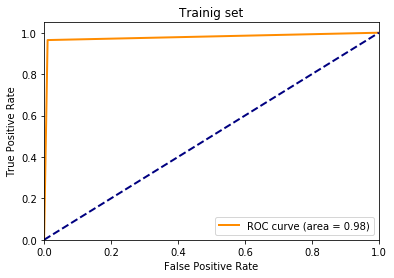

In [13]:

plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Trainig set')
plt.legend(loc="lower right")
plt.show()

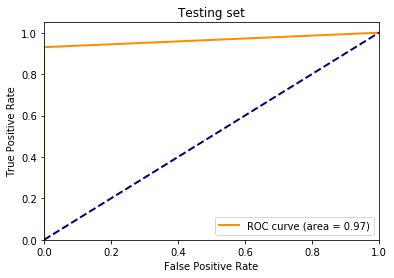

In [14]:
plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing set')
plt.legend(loc="lower right")
plt.show()

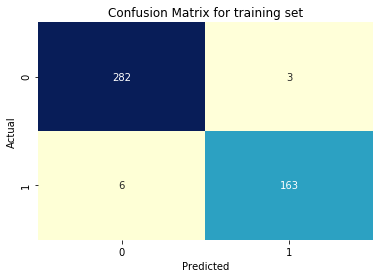

In [15]:
cm=confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot=True,cbar=False,cmap="YlGnBu",fmt="d", )
plt.title("Confusion Matrix for training set")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

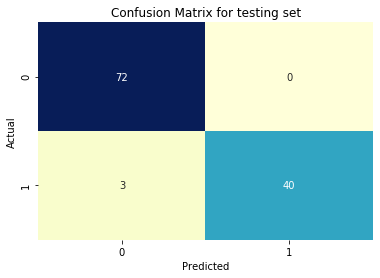

In [16]:
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True,cbar=False,cmap="YlGnBu",fmt="d", )
plt.title("Confusion Matrix for testing set")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [18]:
print("Average Accuracy for Training set:",Average(acc_train))
print("Average Precision for Training set:", Average(prec_train))
print("Average Recall for Training set:", Average(rec_train))
print("Average F-score for Training set:", Average(f_score_train))
print("Average Auc for Training set:", Average(train_auc))
print("\n")
print("Average Accuracy for Testing set:", Average(acc_test))
print("Average Precision for Testing set:", Average(prec_test))
print("Average Recall for Testing set:", Average(rec_test))
print("Average F-score for Testing set:", Average(f_score_test))
print("Average Auc for Testing set:", Average(test_auc))

Average Accuracy for Training set: 0.9844346549192369
Average Precision for Training set: 0.984275197007607
Average Recall for Training set: 0.9737672583826426
Average F-score for Training set: 0.9789845914727612
Average Auc for Training set: 0.9822637461503858


Average Accuracy for Testing set: 0.9692753623188406
Average Precision for Testing set: 0.9778409182989444
Average Recall for Testing set: 0.9395348837209306
Average F-score for Testing set: 0.9581357484008668
Average Auc for Testing set: 0.9632859603789836


b)ii)


In [19]:
acc_train_1 = []
acc_test_1 = []

prec_train_1 = []
prec_test_1 = []

rec_train_1 = []
rec_test_1 = []

f_score_train_1 = []
f_score_test_1 = []

train_auc_1 = []
test_auc_1 = []


In [20]:
cv = 5

for i in range(30):
    df_new = shuffle(df, random_state=i)
    test=df_new.query('diagnosis == 0').head(n=int(np.ceil(df_new.query('diagnosis == 0').shape[0]*0.2)))
    test=test.append(df.query('diagnosis == 1').head(n=int(np.ceil(df_new.query('diagnosis == 1').shape[0]*0.2))))
    train=df_new.drop(test.index)

    Labeled=train.query('diagnosis == 0').sample(frac=0.5)
    Labeled=Labeled.append(train.query('diagnosis == 1').sample(frac=0.5))
#     print(Labeled.diagnosis.value_counts())
    Unlabeled=train.drop(Labeled.index)
#     print(Unlabeled.diagnosis.value_counts())
    param_grid={'C': np.logspace(-2, 10, 13)};
    grid_search_l = GridSearchCV(LinearSVC( penalty='l1', dual=False), param_grid, cv=cv,n_jobs=4)
    grid_search_l.fit(Labeled[Labeled.columns[1:]],Labeled[Labeled.columns[0]])
    grid_search_l.best_params_
    
    while(Unlabeled.shape[0]!=0):
        clf=LinearSVC( penalty='l1', dual=False)
        clf.fit(Labeled[Labeled.columns[1:]],Labeled.diagnosis)
        distanceList=[]
        distanceList=abs(clf.decision_function(Unlabeled[Unlabeled.columns[1:]].values))
        index=sorted(range(len(distanceList)), key=lambda i: distanceList[i])[-1]
        toAdd=pd.DataFrame(Unlabeled.iloc[index]).T
        toAdd.DidDonate=clf.predict(Unlabeled.iloc[index][Unlabeled.columns[1:]].values.reshape(1, -1))[0]
        Labeled=Labeled.append(toAdd)
        Unlabeled=Unlabeled.drop(Unlabeled.index[index])
        
        
    clf.fit(Labeled[Labeled.columns[1:]],Labeled.diagnosis)
    
    y_pred_test = clf.predict(test[test.columns[1:]])
    y_pred_train = clf.predict(train[train.columns[1:]])

    score_test = clf.score(test[test.columns[1:]],test[test.columns[0]])
    score_train = clf.score(train[train.columns[1:]],train[train.columns[0]])

    f1_score_test = metrics.f1_score(test[test.columns[0]], y_pred_test)
    f1_score_train = metrics.f1_score(train[train.columns[0]], y_pred_train)

    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(test[test.columns[0]], y_pred_test)
    fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train[train.columns[0]], y_pred_train)

    auc_test = metrics.auc(fpr_test, tpr_test)
    auc_train = metrics.auc(fpr_train, tpr_train)

    accuracy_test = accuracy_score(test[test.columns[0]], y_pred_test)
    accuracy_train = accuracy_score(train[train.columns[0]], y_pred_train)

    precision_test = precision_score(test[test.columns[0]], y_pred_test)
    precision_train = precision_score(train[train.columns[0]], y_pred_train)

    recall_test = recall_score(test[test.columns[0]], y_pred_test)
    recall_train = recall_score(train[train.columns[0]], y_pred_train)

    acc_train_1.append(accuracy_train)
    acc_test_1.append(accuracy_test)

    prec_train_1.append(precision_train)
    prec_test_1.append(precision_test)

    rec_train_1.append(recall_train)
    rec_test_1.append(recall_test)

    f_score_train_1.append(f1_score_train)
    f_score_test_1.append(f1_score_test)

    train_auc_1.append(auc_train)
    test_auc_1.append(auc_test)
# print(Unlabeled)

In [21]:
Unlabeled.shape


(0, 31)

In [22]:
Labeled.shape

(454, 31)


Confusion Matrix for train data:
 [[282   3]
 [  6 163]]


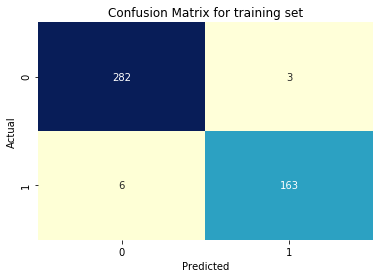

In [23]:
cm=confusion_matrix(y_train,y_pred_train)
print("\nConfusion Matrix for train data:\n",cm)
sns.heatmap(cm, annot=True,cbar=False,cmap="YlGnBu",fmt="d", )
plt.title("Confusion Matrix for training set")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Area under curve for train data: 0.9769853628153223


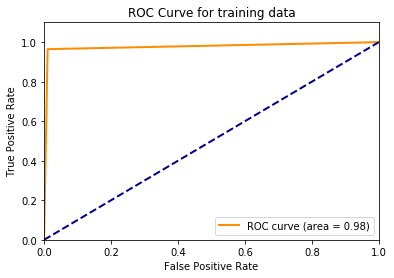

In [24]:
fpr, tpr, _ = roc_curve(y_train,y_pred_train)
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training data')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()


Confusion Matrix for test data:
 [[72  0]
 [ 3 40]]


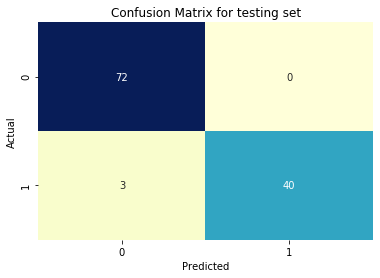

In [25]:
cm=confusion_matrix(y_test,y_pred_test)
print("\nConfusion Matrix for test data:\n",cm)
sns.heatmap(cm, annot=True,cbar=False,cmap="YlGnBu",fmt="d", )
plt.title("Confusion Matrix for testing set")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Area under curve for test data: 0.9651162790697674


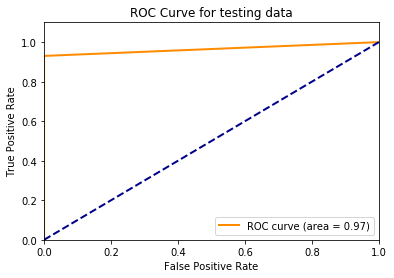

In [26]:
fpr, tpr, _ = roc_curve(y_test,y_pred_test)
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)
plt.figure()
plt.plot(fpr, tpr,color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for testing data')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

In [27]:
print("Average Accuracy for Training set:",Average(acc_train_1))
print("Average Precision for Training set:", Average(prec_train_1))
print("Average Recall for Training set:", Average(rec_train_1))
print("Average F-score for Training set:", Average(f_score_train_1))
print("Average Auc for Training set:", Average(train_auc_1))
print("\n")
print("Average Accuracy for Testing set:", Average(acc_test_1))
print("Average Precision for Testing set:", Average(prec_test_1))
print("Average Recall for Testing set:", Average(rec_test_1))
print("Average F-score for Testing set:", Average(f_score_test_1))
print("Average Auc for Testing set:", Average(test_auc_1))

Average Accuracy for Training set: 0.9842143906020563
Average Precision for Training set: 0.9861983103440097
Average Recall for Training set: 0.9712031558185399
Average F-score for Training set: 0.9786334440307624
Average Auc for Training set: 0.9815664901899722


Average Accuracy for Testing set: 0.9713043478260869
Average Precision for Testing set: 0.9803196252288708
Average Recall for Testing set: 0.9426356589147292
Average F-score for Testing set: 0.9609274192860884
Average Auc for Testing set: 0.9655307924203275


b)iii)

Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='k-means++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

In [28]:
dataset = pd.read_csv("data.csv")
dataset=dataset.drop("id",axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
X = pd.DataFrame()
X = dataset.drop(["diagnosis"],axis=1)

# Taking Benign =1 Malignant=0

Y=np.where(dataset["diagnosis"]=="M",0,1)
Y=pd.DataFrame(Y)
Y.columns=["diagnosis"]
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X=pd.DataFrame(X_scaled)
scaled_data=pd.concat([X,Y],axis=1)

In [30]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [31]:
# Taking Positive class=Benign and Negative class=Malignant

X_benign = scaled_data[scaled_data["diagnosis"]==1]
X_malignant = scaled_data[scaled_data["diagnosis"]==0]

In [32]:
X_test = pd.concat([X_benign.sample(frac=0.2),X_malignant.sample(frac=0.2)])
X_train=scaled_data.drop(index=X_test.index.tolist())
y_test=X_test["diagnosis"]
y_train=X_train["diagnosis"]

X_test = X_test.drop(["diagnosis"],axis=1)
X_train = X_train.drop(["diagnosis"],axis=1)

In [33]:
acc_train_2 = []
acc_test_2 = []

prec_train_2 = []
prec_test_2 = []

rec_train_2 = []
rec_test_2 = []

f_score_train_2 = []
f_score_test_2= []

train_auc_2 = []
test_auc_2 = []


In [34]:

for i in range(0,30):
    
    # Randomly selecting Labelled Data (with 50% positive and 50% negative samples) in train set
    
    X_test = pd.concat([X_benign.sample(frac=0.2),X_malignant.sample(frac=0.2)])
    X_train=scaled_data.drop(index=X_test.index.tolist())
    y_test=X_test["diagnosis"]
    y_train=X_train["diagnosis"]

    X_test = X_test.drop(["diagnosis"],axis=1)
    X_train = X_train.drop(["diagnosis"],axis=1)

    X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

    X_train=X_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    # Computing the centers of two clusters 
    k_means = KMeans(n_clusters=2,init='k-means++',random_state=random.randint(20,200),n_init=20).fit(X_train)
    clus_dist= k_means.transform(X_train)
    #print(k_means.cluster_centers_)

    # Finding the closest 30 data points to each center
    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(X_train)
    distances, indices = nn.kneighbors(k_means.cluster_centers_)

    # Reading the true lables of the 30 datapoints
    clus_0=y_train.loc[indices[0]]
    clus_1=y_train.loc[indices[1]]

    # Taking a majority poll with these 30 points which becomes the label
    # predicted by k-means for the members of each cluster. 
    maj_poll_clus_0=clus_0.value_counts()
    maj_poll_clus_1=clus_1.value_counts()

    # Finding the labels provided by K_means
    pred_labels= k_means.labels_
    pred_labels= pd.DataFrame(pred_labels)

    pred_labels_0=pred_labels[pred_labels[0]==0]
    pred_labels_1=pred_labels[pred_labels[0]==1]

    # Compare the labels provided by K-means with the true labels of the training data

    max_index_0=np.argmax(maj_poll_clus_0)
    max_index_1=np.argmax(maj_poll_clus_1)
    pred_labels_0['class']=max_index_0
    pred_labels_1['class']=max_index_1
    final_pred_y=pd.concat([pred_labels_0['class'],pred_labels_1['class']],axis=0)
    final_pred_y=final_pred_y.sort_index()

    
    y_pred_test = k_means.predict(X_test)
    
    f1_score_test = f1_score(y_test,y_pred_test)
    f1_score_train = f1_score(y_train,final_pred_y)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test,y_pred_test)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train,final_pred_y)

    auc_test = auc(fpr_test, tpr_test)
    auc_train = auc(fpr_train, tpr_train)
    
    accuracy_test = accuracy_score(y_test,y_pred_test)
    accuracy_train = accuracy_score(y_train,final_pred_y)

    precision_test = precision_score(y_test,y_pred_test)
    precision_train = precision_score(y_train,final_pred_y)

    recall_test = recall_score(y_test,y_pred_test)
    recall_train = recall_score(y_train,final_pred_y)

    acc_train_2.append(accuracy_train)
    acc_test_2.append(accuracy_test)

    prec_train_2.append(precision_train)
    prec_test_2.append(precision_test)

    rec_train_2.append(recall_train)
    rec_test_2.append(recall_test)

    f_score_train_2.append(f1_score_train)
    f_score_test_2.append(f1_score_test)

    train_auc_2.append(auc_train)
    test_auc_2.append(auc_test)


Confusion Matrix for train data:
 [[143  27]
 [  8 278]]

Area under curve for train data: 0.9066022213081038


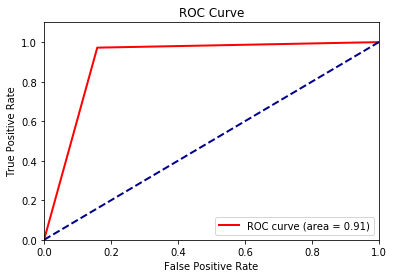

In [35]:
cm = metrics.confusion_matrix(y_train,final_pred_y)
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(y_train,final_pred_y)
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()


Confusion Matrix for test data:
 [[37  5]
 [ 1 70]]

Area under curve for test data: 0.9334339369550637


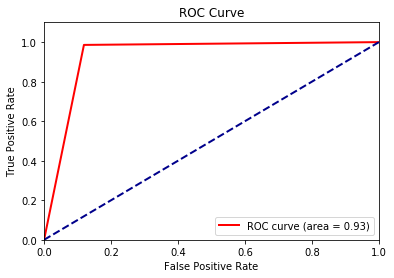

In [36]:

cm = metrics.confusion_matrix(y_test,y_pred_test)
print("\nConfusion Matrix for test data:\n",cm)
fpr, tpr, _ = roc_curve(y_test,y_pred_test)
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

In [37]:
print("Average Accuracy for Training set:",Average(acc_train_2))
print("Average Precision for Training set:", Average(prec_train_2))
print("Average Recall for Training set:", Average(rec_train_2))
print("Average F-score for Training set:", Average(f_score_train_2))
print("Average Auc for Training set:", Average(train_auc_2))
print("\n")
print("Average Accuracy for Testing set:", Average(acc_test_2))
print("Average Precision for Testing set:", Average(prec_test_2))
print("Average Recall for Testing set:", Average(rec_test_2))
print("Average F-score for Testing set:", Average(f_score_test_2))
print("Average Auc for Testing set:", Average(test_auc_2))

Average Accuracy for Training set: 0.9265350877192987
Average Precision for Training set: 0.9151190719896204
Average Recall for Training set: 0.9731934731934735
Average F-score for Training set: 0.9432332186165348
Average Auc for Training set: 0.9106163444398738


Average Accuracy for Testing set: 0.44070796460177
Average Precision for Testing set: 0.4176223831933905
Average Recall for Testing set: 0.4309859154929578
Average F-score for Testing set: 0.4224154276514177
Average Auc for Testing set: 0.4440643863179074


b)iv)

In [44]:
acc_train_3 = []
acc_test_3 = []

prec_train_3 = []
prec_test_3 = []

rec_train_3 = []
rec_test_3 = []

f_score_train_3 = []
f_score_test_3 = []

train_auc_3 = []
test_auc_3 = []

In [45]:
for i in range(0,30):
    
    # Randomly selecting Labelled Data (with 50% positive and 50% negative samples) in train set
     
    X_test = pd.concat([X_benign.sample(frac=0.2),X_malignant.sample(frac=0.2)])
    X_train=scaled_data.drop(index=X_test.index.tolist())
    y_test=X_test["diagnosis"]
    y_train=X_train["diagnosis"]

    X_test = X_test.drop(["diagnosis"],axis=1)
    X_train = X_train.drop(["diagnosis"],axis=1)

    X_label, X_unlabel, y_label, y_unlabel = train_test_split(X_train, y_train, test_size=0.50, stratify=y_train)

    X_train=X_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    # Computing the centers of two clusters 
    sp_clus=SpectralClustering(n_clusters=2,affinity='rbf',n_init=20,random_state=random.randint(20,200)).fit(X_train)
    sp_clus_labels=pd.DataFrame(sp_clus.labels_)
 
    sp_clus_label_0=sp_clus_labels[sp_clus_labels[0]==0].index
    sp_clus_label_1=sp_clus_labels[sp_clus_labels[0]==1].index
    
    sp_clus_0=X_train.iloc[sp_clus_label_0,:]
    sp_clus_1=X_train.iloc[sp_clus_label_1,:]
    
    center_0=sp_clus_0.mean(axis=0)
    center_1=sp_clus_1.mean(axis=0)
    
    centers=pd.DataFrame()
    centers[0]=center_0
    centers[1]=center_1
    #print(centers.T)

    # Finding the closest 30 data points to each center
    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(X_train)
    distances, indices = nn.kneighbors(centers.T)
    

    # Reading the true lables of the 30 datapoints
    sp_clus_0=y_train.loc[indices[0]]
    sp_clus_1=y_train.loc[indices[1]]


    # Taking a majority poll with these 30 points
    maj_poll_clus_0=sp_clus_0.value_counts()
    maj_poll_clus_1=sp_clus_1.value_counts()

    # Finding the labels provided by K_means
    pred_labels_spec= k_means.labels_
    pred_labels_spec= pd.DataFrame(pred_labels_spec)

    pred_labels_spec_0=pred_labels_spec[pred_labels_spec[0]==0]
    pred_labels_spec_1=pred_labels_spec[pred_labels_spec[0]==1]

    # Compare the labels provided by K-means with the true labels of the training data

    max_index_spec_0=np.argmax(maj_poll_clus_0)
    max_index_spec_1=np.argmax(maj_poll_clus_1)
    pred_labels_spec_0['class']=max_index_spec_0
    pred_labels_spec_1['class']=max_index_spec_1
    final_pred_spec_y=pd.concat([pred_labels_spec_0['class'],pred_labels_spec_1['class']],axis=0)
    final_pred_spec_y=final_pred_spec_y.sort_index()

    y_pred_test = sp_clus.fit_predict(X_test)
    
    f1_score_test = f1_score(y_test,y_pred_test)
    f1_score_train = f1_score(y_train,final_pred_spec_y)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test,y_pred_test)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train,final_pred_spec_y)

    auc_test = auc(fpr_test, tpr_test)
    auc_train = auc(fpr_train, tpr_train)
    
    accuracy_test = accuracy_score(y_test,y_pred_test)
    accuracy_train = accuracy_score(y_train,final_pred_spec_y)

    precision_test = precision_score(y_test,y_pred_test)
    precision_train = precision_score(y_train,final_pred_spec_y)

    recall_test = recall_score(y_test,y_pred_test)
    recall_train = recall_score(y_train,final_pred_spec_y)

    acc_train_3.append(accuracy_train)
    acc_test_3.append(accuracy_test)

    prec_train_3.append(precision_train)
    prec_test_3.append(precision_test)

    rec_train_3.append(recall_train)
    rec_test_3.append(recall_test)

    f_score_train_3.append(f1_score_train)
    f_score_test_3.append(f1_score_test)

    train_auc_3.append(auc_train)
    test_auc_3.append(auc_test)


Confusion Matrix for train data:
 [[ 96  74]
 [209  77]]

Area under curve for train data: 0.41696832579185517


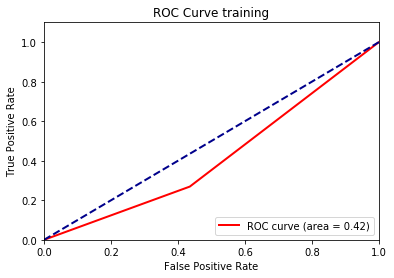

In [46]:
cm = metrics.confusion_matrix(y_train,final_pred_spec_y)
print("\nConfusion Matrix for train data:\n",cm)
fpr, tpr, _ = roc_curve(y_train,final_pred_spec_y)
area_uc = auc(fpr, tpr)
print("\nArea under curve for train data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve training')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()


Confusion Matrix for test data:
 [[13 29]
 [71  0]]

Area under curve for test data: 0.15476190476190477


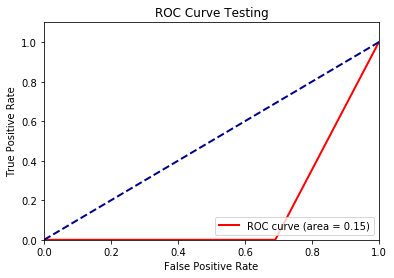

In [47]:

cm = metrics.confusion_matrix(y_test,y_pred_test)
print("\nConfusion Matrix for test data:\n",cm)
fpr, tpr, _ = roc_curve(y_test,y_pred_test)
area_uc = auc(fpr, tpr)
print("\nArea under curve for test data:",area_uc)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Testing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.show()

In [48]:
print("Average Accuracy for Training set:",Average(acc_train_3))
print("Average Precision for Training set:", Average(prec_train_3))
print("Average Recall for Training set:", Average(rec_train_3))
print("Average F-score for Training set:", Average(f_score_train_3))
print("Average Auc for Training set:", Average(train_auc_3))
print("\n")
print("Average Accuracy for Testing set:", Average(acc_test_3))
print("Average Precision for Testing set:", Average(prec_test_3))
print("Average Recall for Testing set:", Average(rec_test_3))
print("Average F-score for Testing set:", Average(f_score_test_3))
print("Average Auc for Testing set:", Average(test_auc_3))

Average Accuracy for Training set: 0.4476608187134502
Average Precision for Training set: 0.55389425686679
Average Recall for Training set: 0.4044289044289044
Average F-score for Training set: 0.4537185677354572
Average Auc for Training set: 0.46241053064582466


Average Accuracy for Testing set: 0.3123893805309735
Average Precision for Testing set: 0.20735269504550102
Average Recall for Testing set: 0.2342723004694836
Average F-score for Testing set: 0.21869950684282133
Average Auc for Testing set: 0.33935837245696404


In [50]:
print("\n Results: ")
zero_data = np.zeros(shape=(5,4))
results = pd.DataFrame(zero_data)
cols = ['Supervised learning', 'Semi-Supervised Learning', 'Unsupervised k-means Learning', 'Spectral']
results.columns = cols
results.rename(index={0:'Accuracy',1:'Precision',2:'Recall',3:'AUC',4:'F-Score'}, inplace=True)

results['Semi-Supervised Learning']['Accuracy']= Average(acc_test)
results['Supervised learning']['Accuracy']= Average(acc_test_1)
results['Spectral']['Accuracy']= Average(acc_test_2)
results['Unsupervised k-means Learning']['Accuracy']= Average(acc_test_3)


results['Semi-Supervised Learning']['Precision']= Average(prec_test)
results['Supervised learning']['Precision']= Average(prec_test_1)
results['Spectral']['Precision']= Average(prec_test_2)
results['Unsupervised k-means Learning']['Precision']= Average(prec_test_3)

results['Semi-Supervised Learning']['Recall']= Average(rec_test)
results['Supervised learning']['Recall']= Average(rec_test_1)
results['Spectral']['Recall']= Average(rec_test_2)
results['Unsupervised k-means Learning']['Recall']= Average(rec_test_3)

results['Semi-Supervised Learning']['AUC']= Average(test_auc)
results['Supervised learning']['AUC']= Average(test_auc_1)
results['Spectral']['AUC']= Average(test_auc_2)
results['Unsupervised k-means Learning']['AUC']= Average(test_auc_3)

results['Semi-Supervised Learning']['F-Score']= Average(f_score_test)
results['Supervised learning']['F-Score']= Average(f_score_test_1)
results['Spectral']['F-Score']= Average(f_score_test_2)
results['Unsupervised k-means Learning']['F-Score']= Average(f_score_test_3)

results


 Results: 


,Supervised learning,Semi-Supervised Learning,Unsupervised k-means Learning,Spectral
Accuracy,0.971304,0.969275,0.312389,0.440708
Precision,0.980320,0.977841,0.207353,0.417622
Recall,0.942636,0.939535,0.234272,0.430986
AUC,0.965531,0.963286,0.339358,0.444064
F-Score,0.960927,0.958136,0.218700,0.422415


It is visible from the table that Supervised learning is performing better than semi-supervised learning and Spectral clusterig is performing better then unsupervised k means. Spectral Clustering is more stable than K means but it is way slower than K means